## Self-Grading Correlation Experiment

In this notebook, I am going to randomly select 100 entries from the v2.0_en Dataset and grade them again myself.

Then I am going to compare these results to the previous grades I myself assigned to the same student responses.

### Hypotheses

1. **H1**: Since I know that my correlation with other Teachers is 0.73 on the same dataset. I am expecting the correlation with myself to be above that level. It would not surprise me if Pearson's R were between 0.8 and 0.9.


### 1. Load the Dataset and Randomly Select Entries

Use: n=100

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('../../../datasets/final/en/asag_v2_en_filter.csv', sep='~', index_col=False)

N = 100
total = len(df)

# setup indices
np.random.choice(42)
idxs = np.random.choice(total, size=N)

sub_df = df.iloc[idxs]
#sub_df.to_csv('./asag_v2_second_score.csv', sep='~', index=False)

In [2]:
idxs

array([ 649,  840, 1811, 1180,  444,  630,  368, 1280, 1560,  106,  506,
       1039,  399, 1248,  626, 1889, 1707, 1049, 1649, 1521, 1396,  896,
        686, 1495, 1738,  874, 1266, 1282,  754,  380,  664,   13, 1675,
         84, 1557, 1249,  124, 1930, 1401,    7,  210, 1307,  480,  110,
       2006,  743,  134, 1985, 1856,  413, 1439, 1265, 1677,  710, 1931,
        549,  416,  862,  518, 1656,   48, 1870, 1682, 1475,  507, 1481,
       1678,  298, 1996,   59, 1690, 1796, 1135, 1738, 1172, 1189,  269,
         58, 1948,  566, 1959, 2009,  522,  361, 1800,    3, 1731, 2000,
        409,   59, 1949, 1809,  783, 1196, 1178, 1984,  957,  972,  501,
       1318])

### 2. Re-Load the Dataset after Custom Grading

In [4]:
df2 = pd.read_csv('./asag_v2_second_score_finished.csv', sep='~')
df2.head(2)

ID  AID  QID                                             Prompt  \
0  4.6    4    6   Using an index outside the bounds of the arra...   
1  1.5    1    5                               What is a variable?    

                                     Model Answer  \
0                                Run-time error.    
1   A location in memory that can store a value.    

                                      Student Answer  MyScore  MyScore2  \
0                                    run-time error         5         5   
1   It is a sybol or name for a value or number. ...        2         2   

           Feedback Feedback_Notes  Score  
0  correct_complete            NaN    5.0  
1     wrong_related            NaN    4.0

### 3. Questions

#### 3.1 How well do I correlate with myself?

In [5]:
df2[['MyScore', 'MyScore2']].corr()

MyScore  MyScore2
MyScore   1.000000  0.801623
MyScore2  0.801623  1.000000

## 3.1 Analysis

Not extremely surprising, however, this was a slightly lower score than I expected. It did meet the **H1** expectations it was just at the lower end of the range.

Let's look at the full statistics now.

In [52]:
import sys
sys.path.append('../../../')
import libs.stats as stats
import libs.utils as utils

In [58]:
stats.print_all_stats(utils.convert_to_pass_fail(df['MyScore'].values), utils.convert_to_pass_fail(df['Score'].values))
#stats.print_all_stats(df['MyScore'].values, np.round(df['Score'].values))

             precision    recall  f1-score   support

          0       0.86      0.28      0.42       477
          1       0.81      0.99      0.89      1533

avg / total       0.83      0.82      0.78      2010

Pearson's R: 0.424067975812053
Cohen's Kappa: 0.34576964028699997
MAE: -0.16069651741293534
Accuracy: 81.84%
Precision: 82.63%
Recall: 81.84%
F1-Measure: 78.06%


## How Well do I correlate with the other human-graders?

In [9]:
df[['MyScore', 'Score']].corr()

MyScore     Score
MyScore  1.000000  0.713148
Score    0.713148  1.000000

## What does a random monkey grading look like?

In [14]:
monkey_scores = np.random.choice([0,1,2,3,4,5], size=len(df))
stats.print_all_stats(monkey_scores, np.round(df['Score']))

             precision    recall  f1-score   support

          0       0.21      0.01      0.02       361
          1       0.12      0.00      0.01       322
          2       0.18      0.13      0.15       317
          3       0.18      0.09      0.12       322
          4       0.18      0.32      0.23       377
          5       0.17      0.49      0.25       311

avg / total       0.17      0.17      0.13      2010

Pearson's R: -0.0018195703257134375
Cohen's Kappa: 0.006480110383177529
MAE: -1.627363184079602
Accuracy: 17.21%
Precision: 17.50%
Recall: 17.21%
F1-Measure: 12.79%


In [45]:
## Binary Classification random scoring
monkey_scores = np.random.choice([0,1], size=len(df))
stats.print_all_stats(monkey_scores, np.round(df['Class2_Score']))

             precision    recall  f1-score   support

          0       0.53      0.24      0.33      1057
          1       0.48      0.77      0.59       953

avg / total       0.51      0.49      0.45      2010

Pearson's R: 0.007399934946387894
Cohen's Kappa: 0.006121557888771001
MAE: -0.2885572139303483
Accuracy: 48.96%
Precision: 50.58%
Recall: 48.96%
F1-Measure: 45.26%


In [47]:
columns = ['Name','Acc', 'Pre', 'Rec', 'F1', 'R', 'K', 'MAE']
data = [
    ['Monkey', 0.1721, 0.1750, 0.1721, 0.1279, -0.0018, 0.0065, -1.627]
]
res = pd.DataFrame(data, columns=columns)

data2 = [
    ['Monkey', 0.4896, 0.5058, 0.4896, 0.4526, 0.0074, 0.0061, -0.289]
]
res2 = pd.DataFrame(data2, columns=columns)

/home/che/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:1363: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


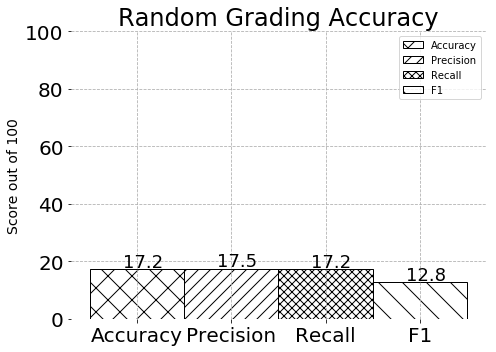

In [50]:
from cycler import cycler
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (7, 5) 

# Styles
monochrome = (cycler('color', ['k']) * cycler('linestyle',
                                              ['-', '--', ':', '=.']) * cycler('marker', ['^', ',', '.']))
bar_cycle = (cycler('hatch', ['///', '--', '...', '\///', 'xxx',
                              '\\\\']) * cycler('color', 'w')*cycler('zorder', [10]))
styles = bar_cycle()


def render_aprf(data, filename, ylim):

    fig, ax = plt.subplots(1, 1)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    ax.set_prop_cycle(monochrome)

    x = np.arange(len(data))
    
    # Grid Setup
    ax.grid(linestyle='--')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # Labels
    ax.set_title('Random Grading Accuracy', size=24)
    #ax.set(xlabel='Score')
    ax.xaxis.label.set_fontsize(14)
    ax.xaxis.padlabel = 40
    ax.set(ylabel='Score out of 100')
    ax.yaxis.label.set_fontsize(14)
    
    labels = ['Accuracy','Precision', 'Recall', 'F1']
    

    # Render
    plt.ylim([0,ylim])
    ax.bar(x, width=0.2, height=data['Acc'] * 100, hatch='x', fill=False)
    ax.bar(x+0.2, width=0.2, height=data['Pre'] * 100, hatch='//', fill=False)
    ax.bar(x+0.4, width=0.2, height=data['Rec'] * 100, hatch='xxx', fill=False)
    ax.bar(x+0.6, width=0.2, height=data['F1'] * 100, hatch='\\', fill=False)
    plt.legend('best', labels=labels)
    
    plt.xticks([0,0.2,0.4,0.6], labels)
    
    # Add numeric values
    pos = []
    pos.append(x)
    pos.append(x+0.2)
    pos.append(x+0.4)
    pos.append(x+0.6)
    pos = np.array(pos)
    
    x_pos = pd.DataFrame(pos.T, columns=['acc_pos', 'pre_pos', 'rec_pos', 'f1_pos'])
    for i in range(0, len(data)):
        acc_v = data.iloc[i]['Acc']*100
        plt.text(x=x_pos['acc_pos'].iloc[i]-0.03, y=acc_v+0.8, s='{:.1f}'.format(acc_v), size=18)
        
        pre_v = data.iloc[i]['Pre']*100
        plt.text(x=x_pos['pre_pos'].iloc[i]-0.03, y=pre_v+0.8, s='{:.1f}'.format(pre_v), size=18)
        
        rec_v = data.iloc[i]['Rec']*100
        plt.text(x=x_pos['rec_pos'].iloc[i]-0.03, y=rec_v+0.8, s='{:.1f}'.format(rec_v), size=18)
        
        f1_v = data.iloc[i]['F1']*100
        plt.text(x=x_pos['f1_pos'].iloc[i]-0.03, y=f1_v+0.8, s='{:.1f}'.format(f1_v), size=18)
    
    plt.tight_layout()
    plt.savefig('../renderings/{}.png'.format(filename))
    plt.show()
    
render_aprf(res, filename='lower_bounds_accuracy_measures', ylim=100)